## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2

"""
建立神經網路，並加入 L1 或 L2
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
#設定超參數
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updati

50000/50000 [==============================] - 15s 297us/step - loss: 1.6245 - acc: 0.5217 - val_loss: 1.7120 - val_acc: 0.4845
Epoch 48/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.6193 - acc: 0.5225 - val_loss: 1.7188 - val_acc: 0.4834
Epoch 49/50
50000/50000 [==============================] - 14s 279us/step - loss: 1.6164 - acc: 0.5245 - val_loss: 1.6948 - val_acc: 0.4863
Epoch 50/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.6117 - acc: 0.5240 - val_loss: 1.6977 - val_acc: 0.49011s
Experiment with Regulizer = 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (De

50000/50000 [==============================] - 13s 262us/step - loss: 1.0479 - acc: 0.6838 - val_loss: 1.7067 - val_acc: 0.4987
Epoch 48/50
50000/50000 [==============================] - 13s 262us/step - loss: 1.0417 - acc: 0.6853 - val_loss: 1.5108 - val_acc: 0.5350
Epoch 49/50
50000/50000 [==============================] - 15s 309us/step - loss: 1.0261 - acc: 0.6896 - val_loss: 1.5568 - val_acc: 0.5229
Epoch 50/50
50000/50000 [==============================] - 16s 323us/step - loss: 1.0171 - acc: 0.6942 - val_loss: 1.5528 - val_acc: 0.5264
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dens

50000/50000 [==============================] - 13s 263us/step - loss: 0.9097 - acc: 0.6807 - val_loss: 1.4869 - val_acc: 0.5087
Epoch 48/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.8933 - acc: 0.6881 - val_loss: 1.4304 - val_acc: 0.5194
Epoch 49/50
50000/50000 [==============================] - 13s 263us/step - loss: 0.8797 - acc: 0.6926 - val_loss: 1.3737 - val_acc: 0.5325-
Epoch 50/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.8712 - acc: 0.6961 - val_loss: 1.4258 - val_acc: 0.5222
Experiment with Regulizer = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Den

Epoch 48/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.9066 - acc: 0.6815 - val_loss: 1.6506 - val_acc: 0.4830
Epoch 49/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.8979 - acc: 0.6858 - val_loss: 1.4329 - val_acc: 0.5185
Epoch 50/50
50000/50000 [==============================] - 14s 283us/step - loss: 0.8861 - acc: 0.6894 - val_loss: 1.4911 - val_acc: 0.5045


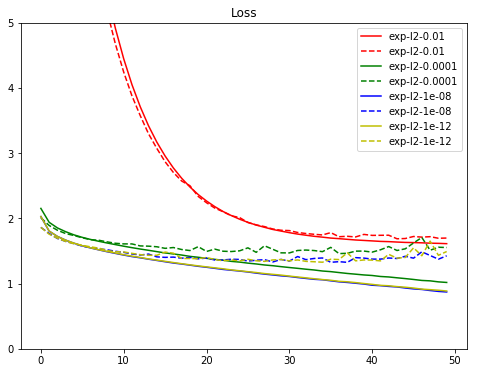

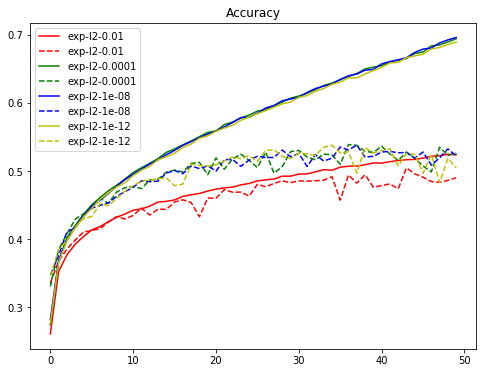

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()